In [1]:
!git clone git@github.com:SMILELab-FL/FedLab.git
!cd FedLab

!pip install fedlab

from google.colab import drive
import os
drive.mount('/content/drive')
folder_path = "/content/drive/My Drive/535 CoLab/"
os.chdir(folder_path)

Cloning into 'FedLab'...
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
/bin/bash: line 1: cd: FedLab: No such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 3.7 MB/s eta 0:00:00
  Created wheel for fedlab: filename=fedlab-1.3.0-py3-none-any.whl size=96034 sha256=254e09f688fe3e85d937239fcfaadae0ec664adb3da113c39a1dc6cba5b73203
  Stored in directory: /root/.cache/pip/wheels/31/76/7a/030e55160ac61de33fc24ef9d65212c0cdae9e7a0720ebedb0
Successfully built fedlab
Mounted at /content/drive


In [2]:
import torch
import torchvision

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append("../../../")

In [3]:
from fedlab.utils.dataset.partition import CIFAR10Partitioner
from fedlab.utils.dataset import functional as F
from fedlab.utils.functional import partition_report

In [4]:
trainset = torchvision.datasets.CIFAR10(root="../../../../data/CIFAR10/", train=True, download=True)

num_clients = 100
num_classes = 10

seed = 2021

hist_color = '#4169E1'
plt.rcParams['figure.facecolor'] = 'white'

100%|██████████| 170M/170M [00:04<00:00, 41.4MB/s]


Extracting ../../../../data/CIFAR10/cifar-10-python.tar.gz to ../../../../data/CIFAR10/


## Hetero Dirichlet

In [18]:
# perform partition
hetero_dir_part = CIFAR10Partitioner(trainset.targets,
                                num_clients,
                                balance=None,
                                partition="dirichlet",
                                dir_alpha=0.3,
                                seed=seed)
# save to pkl file
torch.save(hetero_dir_part.client_dict, "cifar10_hetero_dir.pkl")
print(len(hetero_dir_part))

100


Text(0.5, 0, 'sample num')

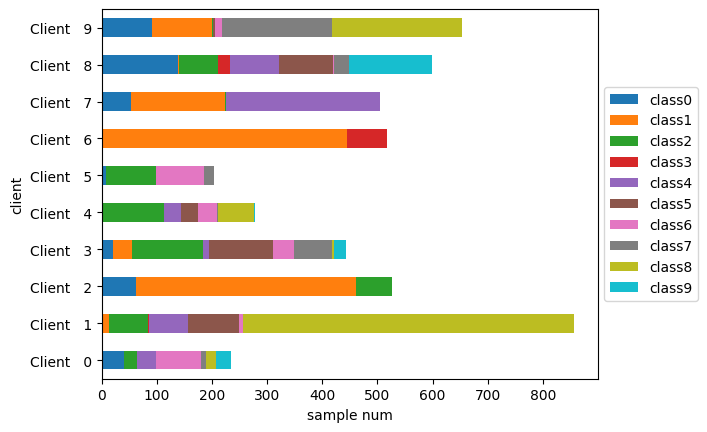

In [19]:
# generate partition report
csv_file = "cifar10_hetero_dir_0.3_100clients.csv"
partition_report(trainset.targets, hetero_dir_part.client_dict,
                 class_num=num_classes,
                 verbose=False, file=csv_file)

hetero_dir_part_df = pd.read_csv(csv_file,header=1)
hetero_dir_part_df = hetero_dir_part_df.set_index('client')
col_names = [f"class{i}" for i in range(num_classes)]
for col in col_names:
    hetero_dir_part_df[col] = (hetero_dir_part_df[col] * hetero_dir_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
hetero_dir_part_df[col_names].iloc[:10].plot.barh(stacked=True)
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')

<Axes: xlabel='num_samples', ylabel='Count'>

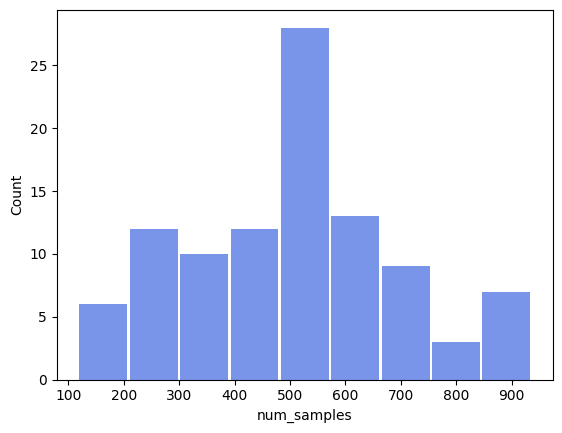

In [7]:
# plot sample number distribution for clients
clt_sample_num_df = hetero_dir_part.client_sample_count
sns.histplot(data=clt_sample_num_df,
             x="num_samples",
             edgecolor='none',
             alpha=0.7,
             shrink=0.95,
             color=hist_color)

## Unbalanced IID

In [8]:
unbalance_iid_part = CIFAR10Partitioner(trainset.targets,
                                num_clients,
                                balance=False,
                                partition="iid",
                                unbalance_sgm=0.3,
                                seed=seed)
# # save to pkl file
# torch.save(unbalance_iid_part.client_dict, "cifar10_unbalance_iid.pkl")
print(len(unbalance_iid_part))

100


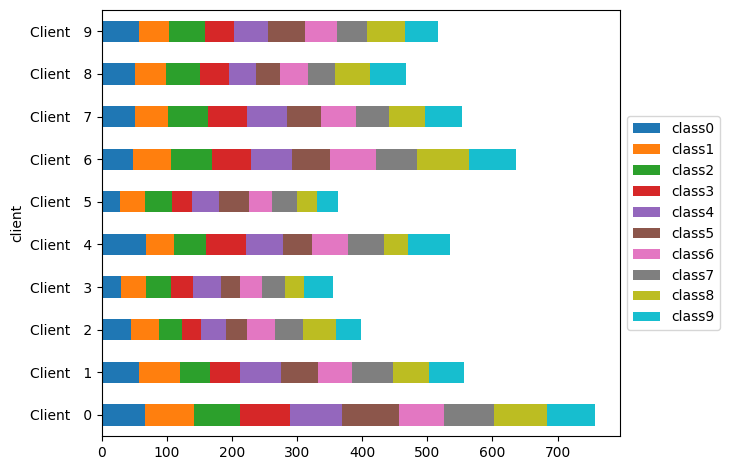

In [9]:
# generate partition report
csv_file = "cifar10_unbalance_iid_unbalance_sgm_0.3_100clients.csv"
partition_report(trainset.targets, unbalance_iid_part.client_dict,
                 class_num=num_classes,
                 verbose=False, file=csv_file)

unbalance_iid_part_df = pd.read_csv(csv_file,header=1)
unbalance_iid_part_df = unbalance_iid_part_df.set_index('client')
col_names = [f"class{i}" for i in range(num_classes)]
for col in col_names:
    unbalance_iid_part_df[col] = (unbalance_iid_part_df[col] * unbalance_iid_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
unbalance_iid_part_df[col_names].iloc[:10].plot.barh(stacked=True)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlabel('sample num')

<Axes: xlabel='num_samples', ylabel='Count'>

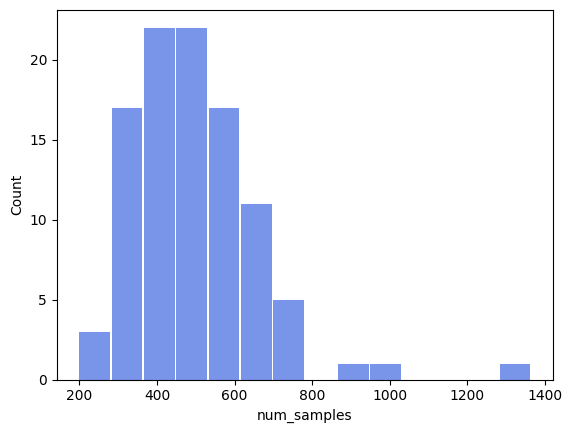

In [10]:
# plot sample number distribution for clients
clt_sample_num_df = unbalance_iid_part.client_sample_count
sns.histplot(data=clt_sample_num_df,
             x="num_samples",
             edgecolor='none',
             alpha=0.7,
             shrink=0.95,
             color=hist_color)

## Balanced Dirichlet

In [11]:
balance_dir_part = CIFAR10Partitioner(trainset.targets,
                                num_clients,
                                balance=True,
                                partition="dirichlet",
                                dir_alpha=0.3,
                                seed=seed)
# # save to pkl file
# torch.save(balance_dir_part.client_dict, "cifar10_balance_dir.pkl")
print(len(balance_dir_part))

Streaming output truncated to the last 5000 lines.
Remaining Data: 1037
Remaining Data: 1037
Remaining Data: 1036
Remaining Data: 1035
Remaining Data: 1034
Remaining Data: 1034
Remaining Data: 1033
Remaining Data: 1033
Remaining Data: 1032
Remaining Data: 1032
Remaining Data: 1031
Remaining Data: 1031
Remaining Data: 1030
Remaining Data: 1030
Remaining Data: 1029
Remaining Data: 1029
Remaining Data: 1029
Remaining Data: 1028
Remaining Data: 1027
Remaining Data: 1027
Remaining Data: 1027
Remaining Data: 1027
Remaining Data: 1027
Remaining Data: 1027
Remaining Data: 1026
Remaining Data: 1026
Remaining Data: 1025
Remaining Data: 1025
Remaining Data: 1025
Remaining Data: 1024
Remaining Data: 1023
Remaining Data: 1023
Remaining Data: 1022
Remaining Data: 1021
Remaining Data: 1021
Remaining Data: 1020
Remaining Data: 1020
Remaining Data: 1019
Remaining Data: 1019
Remaining Data: 1018
Remaining Data: 1018
Remaining Data: 1017
Remaining Data: 1016
Remaining Data: 1016
Remaining Data: 1016
Rema

Text(0.5, 0, 'sample num')

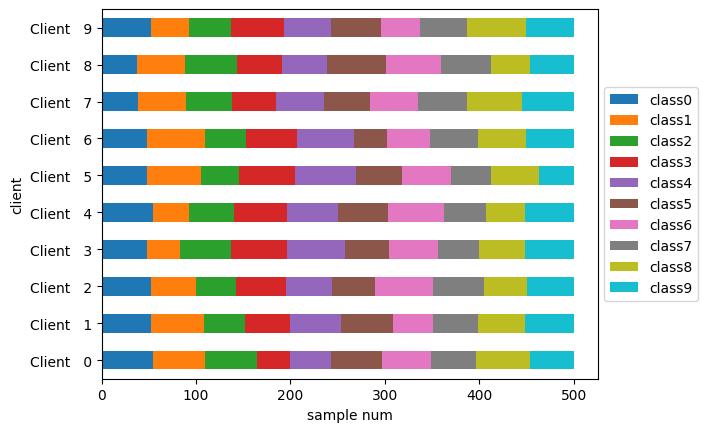

In [12]:
# generate partition report
csv_file = "cifar10_balance_dir_alpha_0.3_100clients.csv"
partition_report(trainset.targets, balance_dir_part.client_dict,
                 class_num=num_classes,
                 verbose=False, file=csv_file)

balance_dir_part_df = pd.read_csv(csv_file,header=1)
balance_dir_part_df = balance_dir_part_df.set_index('client')
col_names = [f"class{i}" for i in range(num_classes)]
for col in col_names:
    balance_dir_part_df[col] = (balance_dir_part_df[col] * balance_dir_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
balance_dir_part_df[col_names].iloc[:10].plot.barh(stacked=True)
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')

## Unbalanced Dirichlet

In [13]:
unbalance_dir_part = CIFAR10Partitioner(trainset.targets,
                                num_clients,
                                balance=False,
                                partition="dirichlet",
                                unbalance_sgm=0.3,
                                dir_alpha=0.3,
                                seed=seed)
# # save to pkl file
# torch.save(unbalance_dir_part.client_dict, "cifar10_unbalance_dir.pkl")
print(len(unbalance_dir_part))

Streaming output truncated to the last 5000 lines.
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 54
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53
Remaining Data: 53

Text(0.5, 0, 'sample num')

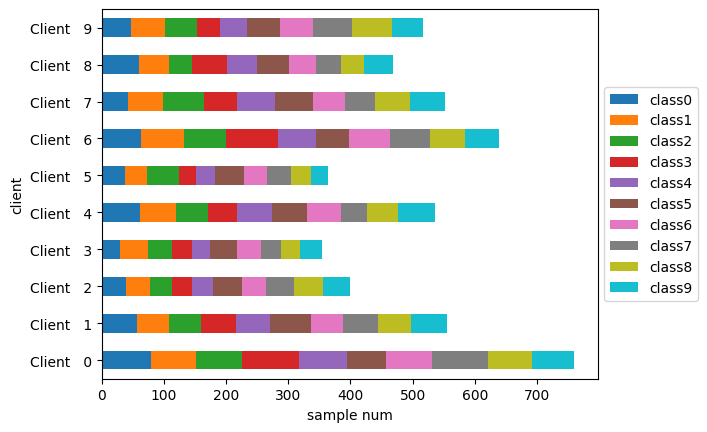

In [14]:
# generate partition report
csv_file = "cifar10_unbalance_dir_alpha_0.3_unbalance_sgm_0.3_100clients.csv"
partition_report(trainset.targets, unbalance_dir_part.client_dict,
                 class_num=num_classes,
                 verbose=False, file=csv_file)

unbalance_dir_part_df = pd.read_csv(csv_file,header=1)
unbalance_dir_part_df = unbalance_dir_part_df.set_index('client')
col_names = [f"class{i}" for i in range(num_classes)]
for col in col_names:
    unbalance_dir_part_df[col] = (unbalance_dir_part_df[col] * unbalance_dir_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
unbalance_dir_part_df[col_names].iloc[:10].plot.barh(stacked=True)
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')

<Axes: xlabel='num_samples', ylabel='Count'>

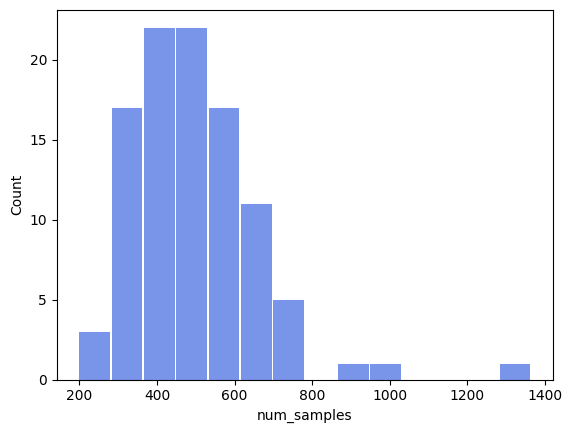

In [15]:
# plot sample number distribution for clients
clt_sample_num_df = unbalance_dir_part.client_sample_count
sns.histplot(data=clt_sample_num_df,
             x="num_samples",
             edgecolor='none',
             alpha=0.7,
             shrink=0.95,
             color=hist_color)